### Goal: Explore DC bike data to understand the demand for bicycle rentals over time and fit a regression line to the data.

### Time-related patterns that bike counts show

#### Daily Patterns: 
- There are higher bike counts during morning and evening rush hours due to commuting and work related activities

#### Weekly Patterns:  
- Weekdays have higher bike counts due to commuting and work-related activities, while weekends may show different patterns with increased leisure or recreational activities

#### Seasonal Patterns: 
- Bike counts may be higher during favorable weather conditions like spring or summer, when more people engage in outdoor activities and tourism is at peak



### Rolling average

In [ ]:
subset_df = df [ ( df['month'] == 1 ) & (df['year'] == 2011)]

subset_df['rolling_avg'] = subset_df['count'].rolling(window=10).mean()

sns.lineplot(data=subset_df, 
             x='datetime', 
             y='count', 
             label='Count')
sns.lineplot(data=subset_df,
             x='datetime', 
             y='rolling_avg', 
             label='Rolling Average')

xtick_labels = [str(label.get_text()).replace('-', '\n') for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(xtick_labels) #used to edit the ticklabes



plt.xlabel('Datetime')
plt.ylabel('Count')
plt.title('Count and Rolling Average Over Time - January 2011')
plt.legend()



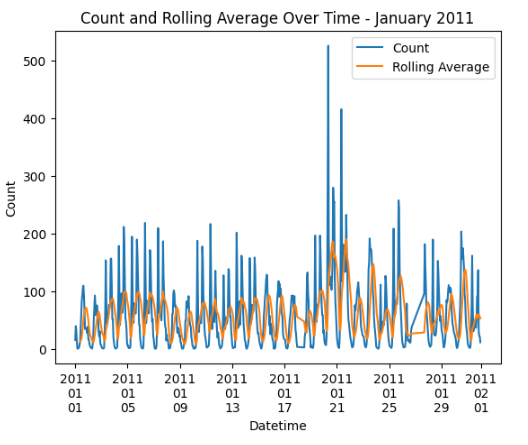
- The "count"  shows the exact number of bikes rented at each specific time
- The "rolling average" shows the average number of bike rentals over a specific time period. 

- The rolling average line is lower than the count line, it shows that the average number of bike counts is lower than the actual count.










### Pivot table

In [ ]:
pivot_table = df.pivot_table(values='count',  #assuming traffic_density is count in the df
                             columns='hour',
                             index=['weekday'],
                             aggfunc="mean")

plt.figure(figsize=(10, 6))  

sns.heatmap(pivot_table,
            cmap='Blues', #cmap sets the color map for the heatmap
            cbar=True)  #cabr shows the color bar indicating the color scale

plt.yticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],  rotation=45)
plt.xlabel('Hour',rotation=45)
plt.ylabel('Weekday')
plt.title('Traffic Density Variations by Weekday and Hour')



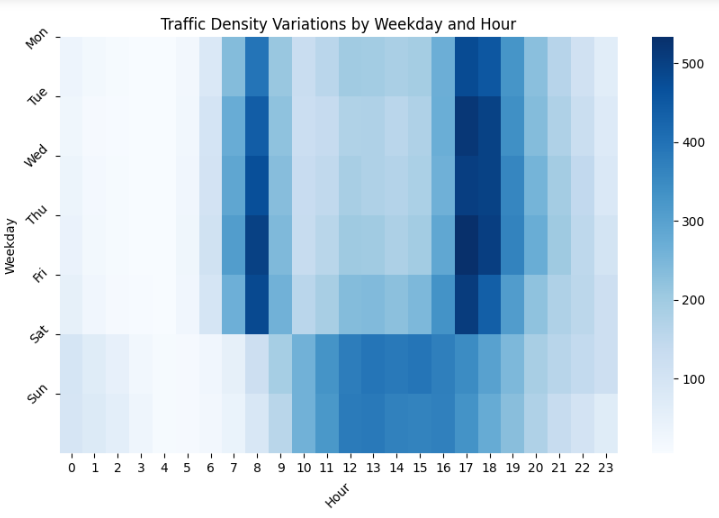

- Peak Commuting Hours:  These peak hours typically are morning rush hour (e.g., 7 am to 9 am) and evening rush hour (e.g., 5 pm to 7 pm).

- Workdays vs. Weekends: 

- Stakeholders can be focused on areas and times with higher traffic density, target those areas for improvements


### Error Metric and Naive Forecast

In [ ]:
count_2011 = df_may_2011['count']
count_2012 = df_may_2012['count']

rmse = sm.rmse(count_2011, count_2012)
rmse



- used the counts from may 2011 to predict counts for 2012
- used rmse to measure the accuracy of the prediction model

- The RMSE represents the average difference between the predicted and actual values,showing how far off, on average, the naive prediction was from the actual values. A lower RMSE value suggests a better fit between the prediction and the actual data.

- On average, the difference between the predicted values (May 2012 count) and the actual values (May 2011 count) is approximately **168** which may suggest that the naive prediction has a relatively high level of error or deviation from the actual values.

### Linear Regression


In [ ]:
#model_1

model_1 = sm.ols(formula='count ~ temp + humidity', data=subset_df).fit()  # instantiate and fit the model
model_1.params
model_1.rsquared_adj

#model_4

model_4 = sm.ols(formula='count ~ season + temp  + hour + day + part_of_day  ', data=subset_df2).fit()
model_4.params
model_4.rsquared


- A linear regression model helps us understand the relationship between a dependent variable (**count** of bike rentals) and one or more independent variables (**season, temp, hour, day, part_of_day** )

- It assumes a linear relationship between the dependent variable and the independent variables

- R-squared shows how well the linear regression model fits the data. 

- A higher R-squared value indicates a better fit of the model to the data. It shows that the model is more effective at predicting the bike rental counts based on the given independent variables.

- Improved the r² score to **0.464** from **0.266** if we also consider season, day, part_of_day and hour



In [ ]:
x= subset_df2['hour']
y=subset_df2['count']

regression_line = np.polyfit(x, y, deg=1)
x_values = np.linspace(min(x), max(x), 100)
y_values = np.polyval(regression_line, x_values)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Regression Line')
plt.legend()
plt.show()

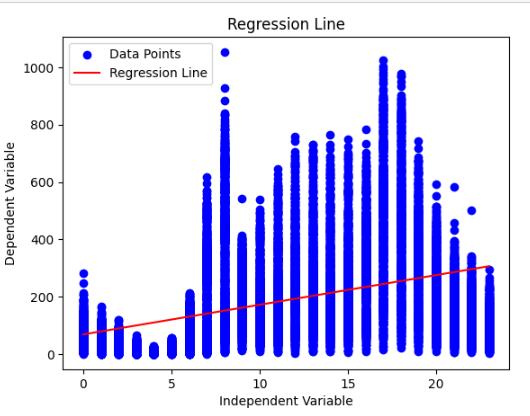

### Distribution Function

In [ ]:
sns.set(style='dark')
sns.displot(data = df_year, 
            x= 'temp',
            kde=True,
           stat="probability")
plt.title('Distribution of Temperature for 2011');

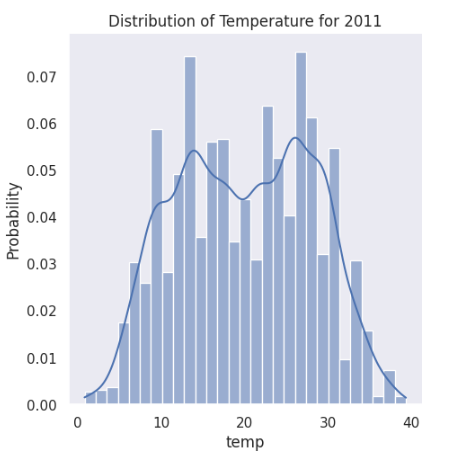

The plot shows the distribution of temperature as a probability. This means that the height of the curve or the area under the curve represents the likelihood of observing specific temperature values.

### Confidence Levels

- range of values that is likely to contain the true value that we are trying to estimate

- Bootstrapping provides a wider range of values for the average windspeed, taking into account more possibilities in the data. The z-formula gives a narrower range, but it may not consider all the possible variations.

**Bootstrapping method results: with n=100**
- Confidence Interval of the average windspeed is between 11.03061145858586and 14.450158837500004

**Bootstrapping method results: with n=10,000**
- Confidence Interval of the average windspeed is between 12.553099146249998 and 12.92241212425

**Statistical formula results:**
- Confidence Interval of the average windspeed is between 12.601614931415103 and 12.87146431365078

#### A/B Testing
- To compare two different versions of a variable or feature to determine which one performs better.

In [ ]:
temp = df["temp"]
atemp = df["atemp"]

test_statistic, pvalue = stats.ttest_ind(temp, atemp)
print ('test_statistic = ', test_statistic)
print ('pvalue = ', pvalue)

alpha = 0.05 
#significance value: 5% of the times we will be able to reject the null hypothesis and 95% we will not

if pvalue < alpha:
    print('The H0 is rejected and there is a difference between temp and atemp')
else:
    print('Failed to reject H0 and there is no difference between temp and atemp')

**The H0 is rejected and there is a difference between temp and atemp**

#### Clustering